In [6]:
#This program generates FIG. 4B & 5C,D,E,F
#Fig4B: Perturbation matrix in different FB conditions
#Fig5B: Perturbation matrix in  FF + FB condition
#Fig5D,E,F: Comparison between perturbation matrices in different conditions

In [154]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

In [155]:
#Importing some info I need 
runtime=np.loadtxt("../general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

#Print Some information about the mdodel
print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [210]:
# You select one folder "state" and the correspondant folder "input" with the perturbation data depending on which matrix condition you want to create

#folder_state='../simulations_data/In_spontaneuous/i_none/Sp_0' #Spontanous
#folder_state='../simulations_data/In_with_e4/i_input4/Sp_1'    #FF
#folder_state='../simulations_data/In_with_e5/i_input5/Sp_1'     #FB
#folder_state='../simulations_data/In_with_e4e5/i_input45/Sp_1' #FF+FB

#Feedback conditions:
#folder_state='../simulations_data/In_with_Feedback/In_with_e23/i_input23/Sp_1'                   #FB layer 2/3
#folder_state='../simulations_data/In_with_Feedback/In_with_e23_e5_half_each/i_input_23_5/Sp_1'   #FB layer 2/3 & 5
folder_state='../simulations_data/In_with_Feedback/In_with_e5_pv5_half_each/i_input_e5_pv5/Sp_1' #FB layer 5 pv
#folder_state='../simulations_data/In_with_Feedback/In_with_e6/i_input6/Sp_1'                     #FB layer 6

#Folders with the PERTURBATION data:

#folder_input='../simulations_data/In_spontaneuous' #Spontanous
#folder_input='../simulations_data/In_with_e4'      #FF
#folder_input='../simulations_data/In_with_e5'       #FB
#folder_input='../simulations_data/In_with_e4e5'    #FF+FB


#Feedback conditions (perturbations data):
#folder_input='../simulations_data/In_with_Feedback/In_with_e23'              #FB layer 2/3
#folder_input='../simulations_data/In_with_Feedback/In_with_e23_e5_half_each' #FB layer 2/3 & 5
folder_input='../simulations_data/In_with_Feedback/In_with_e5_pv5_half_each' #FB layer 5 pv
#folder_input='../simulations_data/In_with_Feedback/In_with_e6'               #FB layer 6

#This is the threshold to check how much increase I am interested in 
threshold=0.2

In [211]:
#------------------------------------------------------------------------------
# Import the files 
#------------------------------------------------------------------------------

#This funciton takes the name of the folder and import all the spike data 
#The function returns the number of spikes for each group of neurons 

def take_files(a):
    
    #layer1
    S_vip1num_spikes=np.array(np.loadtxt(a+'/S_vip1numspike.txt') )

    #layer23
    S_e23num_spikes=np.array(np.loadtxt(a+'/S_e23numspike.txt') )
    S_pv23num_spikes=np.array(np.loadtxt(a+'/S_pv23numspike.txt') )
    S_sst23num_spikes=np.array(np.loadtxt(a+'/S_sst23numspike.txt') )
    S_vip23num_spikes=np.array(np.loadtxt(a+'/S_vip23numspike.txt') )

    #layer4
    S_e4num_spikes=np.array(np.loadtxt(a+'/S_e4numspike.txt') )
    S_pv4num_spikes=np.array(np.loadtxt(a+'/S_pv4numspike.txt') )
    S_sst4num_spikes=np.array(np.loadtxt(a+'/S_sst4numspike.txt') )
    S_vip4num_spikes=np.array(np.loadtxt(a+'/S_vip4numspike.txt') )

    #layer5
    S_e5num_spikes=np.array(np.loadtxt(a+'/S_e5numspike.txt') )
    S_pv5num_spikes=np.array(np.loadtxt(a+'/S_pv5numspike.txt') )
    S_sst5num_spikes=np.array(np.loadtxt(a+'/S_sst5numspike.txt') )
    S_vip5num_spikes=np.array(np.loadtxt(a+'/S_vip5numspike.txt') )

    #layer6
    S_e6num_spikes=np.array(np.loadtxt(a+'/S_e6numspike.txt') )
    S_pv6num_spikes=np.array(np.loadtxt(a+'/S_pv6numspike.txt') )
    S_sst6num_spikes=np.array(np.loadtxt(a+'/S_sst6numspike.txt') )
    S_vip6num_spikes=np.array(np.loadtxt(a+'/S_vip6numspike.txt') ) 
    
    return S_vip1num_spikes,S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes, S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes

In [212]:
#------------------------------------------------------------------------------
# Compute the rates for all the neuron groups 
#------------------------------------------------------------------------------

#Funciton to compute the mean firing rates for all the neuron groups given the number spikes 
def compute_FR(N,N1,runtime,S_vip1num_spikes,
              S_e4num_spikes,S_pv4num_spikes,S_sst4num_spikes,S_vip4num_spikes,
              S_e5num_spikes,S_pv5num_spikes,S_sst5num_spikes,S_vip5num_spikes,
              S_e6num_spikes,S_pv6num_spikes,S_sst6num_spikes,S_vip6num_spikes,
             S_e23num_spikes,S_pv23num_spikes,S_sst23num_spikes,S_vip23num_spikes):

    #runtime must be in seconds (it is in ms now)
    runtime=runtime/1000
    tot_sp_vip1 =  S_vip1num_spikes  #Layer 2/3
    rate_vip1= tot_sp_vip1/(N1*runtime)

    print("runtime: %s" %runtime)
    tot_sp_e23 =  S_e23num_spikes  #Layer 2/3
    #print(tot_sp_e23)
    #print(tot_sp_e23)
    #print(N[0][0])
    # Total number of spikes and rate for each group:
    rate_e23= tot_sp_e23/(N[0][0]*runtime)
    tot_sp_pv23 =  S_pv23num_spikes
    rate_pv23= tot_sp_pv23/(N[0][1]*runtime)
    tot_sp_sst23 =  S_sst23num_spikes
    rate_sst23= tot_sp_sst23/(N[0][2]*runtime)
    tot_sp_vip23 =  S_vip23num_spikes
    rate_vip23= tot_sp_vip23/(N[0][3]*runtime)
    #print(tot_sp_vip23)

    tot_sp_e4 =  S_e4num_spikes
    rate_e4= tot_sp_e4/(N[1][0]*runtime)
    tot_sp_pv4 =  S_pv4num_spikes
    rate_pv4= tot_sp_pv4/(N[1][1]*runtime)
    tot_sp_sst4 =  S_sst4num_spikes
    rate_sst4= tot_sp_sst4/(N[1][2]*runtime)
    tot_sp_vip4 =  S_vip4num_spikes
    rate_vip4= tot_sp_vip4/(N[1][3]*runtime)

    tot_sp_e5 =  S_e5num_spikes
    rate_e5= tot_sp_e5/(N[2][0]*runtime)
    tot_sp_pv5 =  S_pv5num_spikes
    rate_pv5= tot_sp_pv5/(N[2][1]*runtime)
    tot_sp_sst5 =  S_sst5num_spikes
    rate_sst5= tot_sp_sst5/(N[2][2]*runtime)
    tot_sp_vip5 =  S_vip5num_spikes
    rate_vip5= tot_sp_vip5/(N[2][3]*runtime)


    tot_sp_e6 =  S_e6num_spikes
    rate_e6= tot_sp_e6/(N[3][0]*runtime)
    tot_sp_pv6 =  S_pv6num_spikes
    rate_pv6= tot_sp_pv6/(N[3][1]*runtime)
    tot_sp_sst6 =  S_sst6num_spikes
    rate_sst6= tot_sp_sst6/(N[3][2]*runtime)
    tot_sp_vip6 =  S_vip6num_spikes
    rate_vip6= tot_sp_vip6/(N[3][3]*runtime)
    
    print("-----------------------Computing the firing rates--------------------------------")
    print('rate_vip1: %f'%(rate_vip1))
    print('rate_e23: %f rate_pv23: %f rate_sst23: %f rate_vip23: %f'%(rate_e23,rate_pv23,rate_sst23,rate_vip23))
    print('rate_e4: %f rate_pv4: %f rate_sst4: %f rate_vip4: %f'%(rate_e4,rate_pv4,rate_sst4,rate_vip4))
    print('rate_e5: %f rate_pv5: %f rate_sst5: %f rate_vip5: %f'%(rate_e5,rate_pv5,rate_sst5,rate_vip5))
    print('rate_e6: %f rate_pv6: %f rate_sst6: %f rate_vip6: %f'%(rate_e6,rate_pv6,rate_sst6,rate_vip6))
    
    return rate_e23,rate_pv23,rate_sst23,rate_vip23,rate_e4,rate_pv4,rate_sst4,rate_vip4,rate_e5,rate_pv5,rate_sst5,rate_vip5,rate_e6,rate_pv6,rate_sst6,rate_vip6


In [213]:
# Import the files in which no perturbation input is given 
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0=take_files(folder_state)

#Compute the rates

rate_e23_0,rate_pv23_0,rate_sst23_0,rate_vip23_0,rate_e4_0,rate_pv4_0,rate_sst4_0,rate_vip4_0,rate_e5_0,rate_pv5_0,rate_sst5_0,rate_vip5_0,rate_e6_0,rate_pv6_0,rate_sst6_0,rate_vip6_0=compute_FR(N,N1,runtime,
S_vip1num_spikes_0,S_e4num_spikes_0,S_pv4num_spikes_0,S_sst4num_spikes_0,
S_vip4num_spikes_0,S_e5num_spikes_0,S_pv5num_spikes_0,S_sst5num_spikes_0,
S_vip5num_spikes_0,S_e6num_spikes_0,S_pv6num_spikes_0,S_sst6num_spikes_0,
S_vip6num_spikes_0,S_e23num_spikes_0,S_pv23num_spikes_0,S_sst23num_spikes_0,S_vip23num_spikes_0)

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 1.461806
rate_e23: 0.235167 rate_pv23: 3.548718 rate_sst23: 4.219858 rate_vip23: 9.345794
rate_e4: 1.059736 rate_pv4: 4.452381 rate_sst4: 1.716981 rate_vip4: 2.086420
rate_e5: 4.912731 rate_pv5: 9.550265 rate_sst5: 3.767857 rate_vip5: 7.848485
rate_e6: 0.717604 rate_pv6: 7.852941 rate_sst6: 6.993464 rate_vip6: 3.263158


In [214]:
#I create the matrix that will contain the firing rate of each population in that particular simulation
#The input is given to one different population for every simulation.

Matrix_all=[] #create empty array

for i in ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10','i11','i12','i13','i14','i15','i16']:
    
    #i1 contains the data of the simualtion with perturbative input to first population (E2/3)
    #i2 (input to PV2/3), etc. 
    #I have 16 simulations: input to one population in each simualtion (16 populations in total)
    
    #Import the data of one simulation 'i'
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1=take_files(folder_input+'/'+i+'/Sp_1')

    #compute the rates 
    rate_e23_1,rate_pv23_1,rate_sst23_1,rate_vip23_1,rate_e4_1,rate_pv4_1,rate_sst4_1,rate_vip4_1,rate_e5_1,rate_pv5_1,rate_sst5_1,rate_vip5_1,rate_e6_1,rate_pv6_1,rate_sst6_1,rate_vip6_1=compute_FR(N,N1,runtime,
    S_vip1num_spikes_1,S_e4num_spikes_1,S_pv4num_spikes_1,S_sst4num_spikes_1,
    S_vip4num_spikes_1,S_e5num_spikes_1,S_pv5num_spikes_1,S_sst5num_spikes_1,
    S_vip5num_spikes_1,S_e6num_spikes_1,S_pv6num_spikes_1,S_sst6num_spikes_1,
    S_vip6num_spikes_1,S_e23num_spikes_1,S_pv23num_spikes_1,S_sst23num_spikes_1,S_vip23num_spikes_1)


    #PERCENTAGE CHANGE of the firing rate of EACH population (I compare to the value before the input)
    dif_e23=(rate_e23_1 - rate_e23_0)/ rate_e23_0
    dif_pv23=(rate_pv23_1 - rate_pv23_0) / rate_pv23_0
    dif_sst23=(rate_sst23_1 - rate_sst23_0) / rate_sst23_0
    dif_vip23= (rate_vip23_1 - rate_vip23_0)/rate_vip23_0
    dif_e4=(rate_e4_1 - rate_e4_0 )/rate_e4_0
    dif_pv4=(rate_pv4_1 - rate_pv4_0) /rate_pv4_0
    dif_sst4=(rate_sst4_1 - rate_sst4_0) /rate_sst4_0
    dif_vip4=(rate_vip4_1 - rate_vip4_0) /rate_vip4_0
    dif_e5=(rate_e5_1 - rate_e5_0) /rate_e5_0
    dif_pv5=(rate_pv5_1 - rate_pv5_0) /rate_pv5_0
    dif_sst5=(rate_sst5_1 - rate_sst5_0) /rate_sst5_0
    dif_vip5=(rate_vip5_1 - rate_vip5_0) /rate_vip5_0
    dif_e6=(rate_e6_1 - rate_e6_0) /rate_e6_0
    dif_pv6=(rate_pv6_1 - rate_pv6_0) /rate_pv6_0
    dif_sst6=(rate_sst6_1 - rate_sst6_0) /rate_sst6_0
    dif_vip6=(rate_vip6_1 - rate_vip6_0) /rate_vip6_0
    

    #I create the first row of the matrix containing all the rates
    dif_row=[dif_e23,dif_pv23,dif_sst23,dif_vip23,
            dif_e4,dif_pv4,dif_sst4,dif_vip4,
             dif_e5,dif_pv5,dif_sst5,dif_vip5,
             dif_e6,dif_pv6,dif_sst6,dif_vip6]
    
    Matrix_all.append(dif_row) #Fill the matrix with the data you computed

runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 1.614583
rate_e23: 5.986246 rate_pv23: 6.164103 rate_sst23: 7.822695 rate_vip23: 17.557632
rate_e4: 0.975908 rate_pv4: 8.870748 rate_sst4: 2.327044 rate_vip4: 7.432099
rate_e5: 6.484031 rate_pv5: 13.761905 rate_sst5: 5.976190 rate_vip5: 7.878788
rate_e6: 0.575614 rate_pv6: 9.209150 rate_sst6: 7.022876 rate_vip6: 3.649123
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 1.309028
rate_e23: 0.123247 rate_pv23: 11.702564 rate_sst23: 3.368794 rate_vip23: 8.295950
rate_e4: 0.866997 rate_pv4: 3.806122 rate_sst4: 1.559748 rate_vip4: 1.728395
rate_e5: 4.798471 rate_pv5: 8.179894 rate_sst5: 3.720238 rate_vip5: 7.787879
rate_e6: 0.727633 rate_pv6: 7.741830 rate_sst6: 6.983660 rate_vip6: 3.438596
runtime: 3.0
-----------------------Computing the firing rates--------------------------------
rate_vip1: 0.940972
rate_e23: 0.120011 rate_pv23

In [215]:
#Save the matrix in one file
filename_matrix = folder_input.replace('../simulations_data/', '').replace('/', '_') +'.txt'
print(filename_matrix)

f=open('../simulations_data/matrix/'+filename_matrix,'w+') #create the file to write the values of the matrix
for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %Matrix_all[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

In_with_Feedback_In_with_e5_pv5_half_each.txt


In [216]:
#I import the matrix I just created
m_import=np.loadtxt('../simulations_data/matrix/'+filename_matrix)
#print(m_import)

In [217]:
#Plot of the matrix
#Percentage change of the firing rate of each population as effect of the perturbation input to one population ("source population").

# fig = plt.figure(figsize=(8, 6)) #create the figure
# x_axis_labels = ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
# y_axis_labels = ['e23','pv23','sst23','vip23','e4','pv4','sst4','vip4','e5','pv5','sst5','vip5','e6','pv6','sst6','vip6'] # labels for x-axis
# mA_plot = sns.heatmap(np.array(m_import),square=True,cmap='Reds',xticklabels=x_axis_labels, yticklabels=y_axis_labels) # plot GH with heatmap
# #norm=LogNorm()
# mA_plot.set_xlabel('Effect on', fontsize=15)
# mA_plot.set_ylabel('Input to', fontsize=15)
# plt.title('Matrix state',fontsize=18)
# plt.show(mA_plot)

In [218]:
#I WANT A MATRIX with:
#1 if the fr is increased (by more than threshold%)
#-1 if the fr is decreased (by more than threshold%)
#0 if is the same (less/more by less than threshold%)

sign_matrix= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 

for h in range(0,16):
    for k in range(0,16):
        if m_import[h][k]>0 and m_import[h][k]>threshold :
            sign_matrix[h][k]=1
        elif abs(m_import[h][k])<threshold :
            sign_matrix[h][k]=0
        elif m_import[h][k]<0 and abs(m_import[h][k])>threshold :
            sign_matrix[h][k]=-1
#print(sign_matrix) 

In [219]:
#Save the sign matrix in one file
#create a name for the file containing the matrix
filename_matrix_sign=str(threshold)+'_sign_'+filename_matrix
print(filename_matrix_sign)

#Save the matrix
f=open('../simulations_data/matrix/'+filename_matrix_sign,'w+') #create the file to write the values of the sign matrix
for i in range(0,16):
    for j in range(0,16):
        f.write('%f ' %sign_matrix[i][j]) # write the value in the i,j position of the matrix 
    f.write('\n')
f.close()

0.2_sign_In_with_Feedback_In_with_e5_pv5_half_each.txt


In [220]:
#I import the matrix I just created
sign_matrix=np.loadtxt('../simulations_data/matrix/'+filename_matrix_sign)

In [221]:
#Here I create the perturbation matrix plot (with the selected data):

#Figure 4B: four perturbation matrices for 4 different feedback conditions
#Figure 5C: perturbation matrix for FF + FB condition

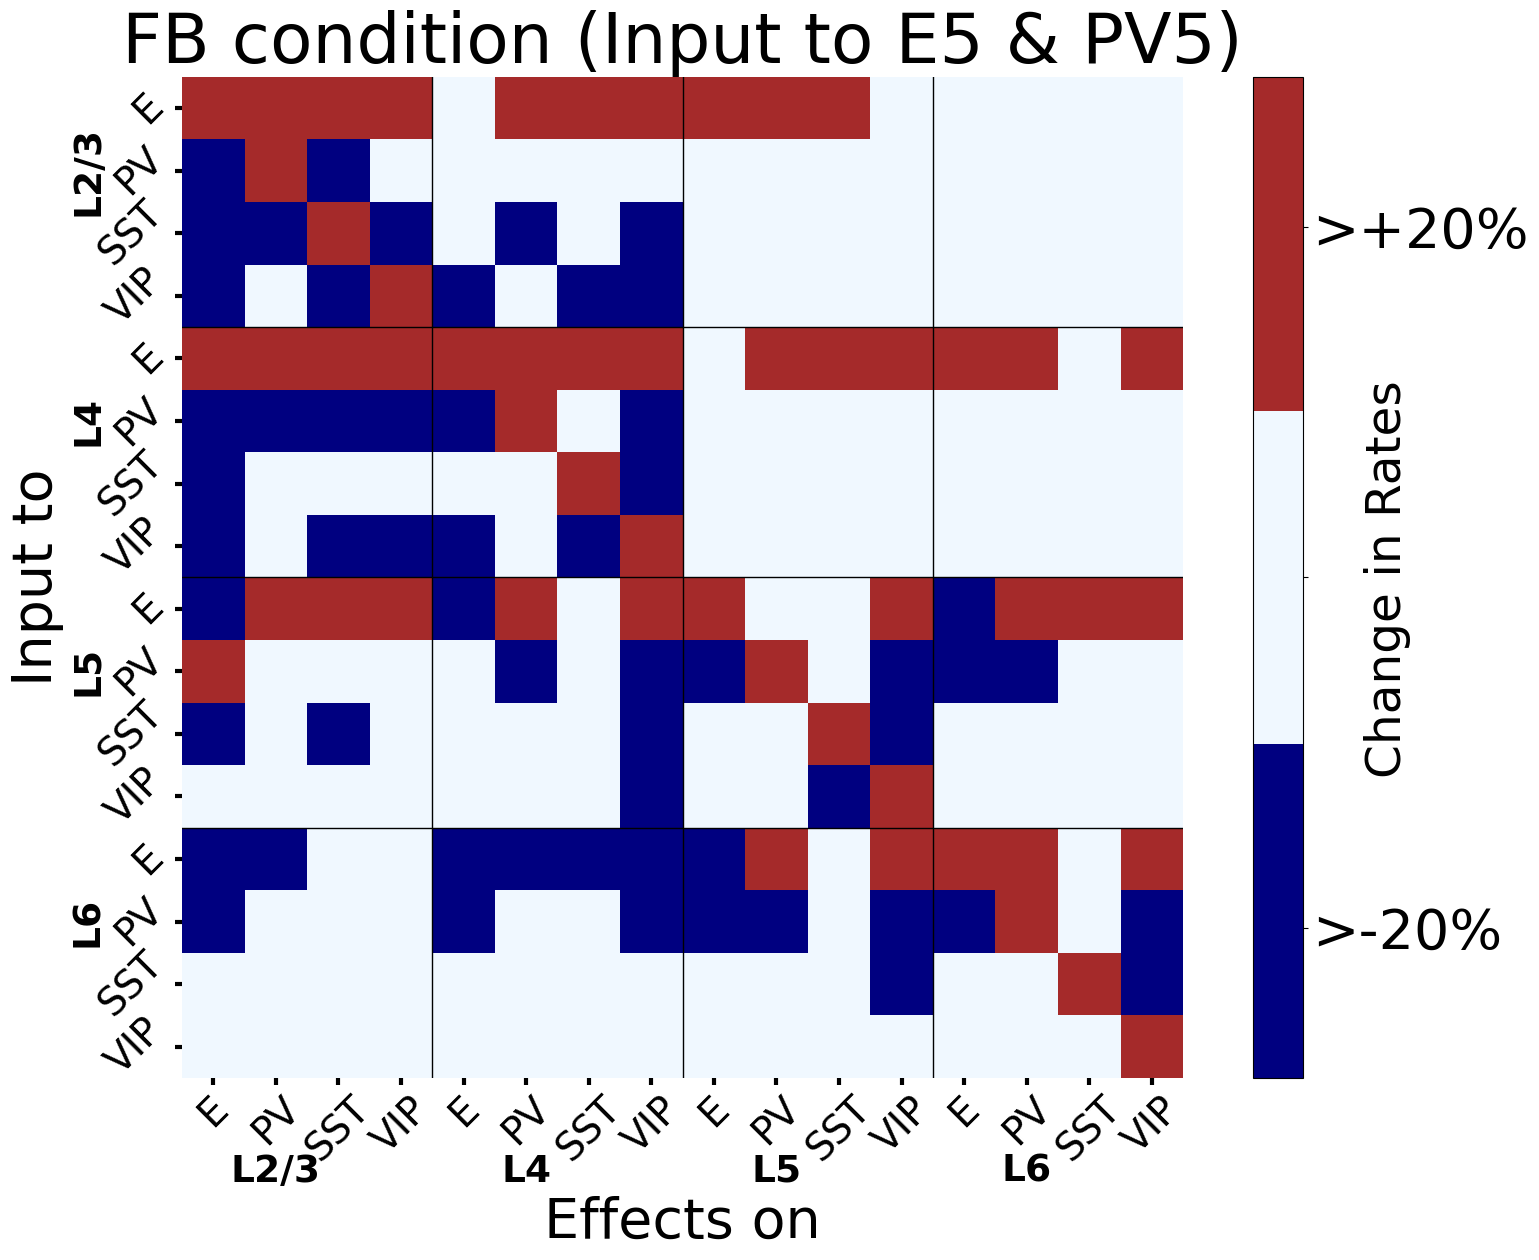

In [223]:
fig = plt.figure(figsize=(18, 13)) #create the figure

#Labels for the axes
x_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP'] # labels for x-axis
y_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']


colors = ["navy", "aliceblue",'brown' ]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)

#Plot
mA_plot = sns.heatmap(np.array(sign_matrix),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap
#Layout
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels(mA_plot.get_xmajorticklabels(), fontsize = 28,rotation=45)
mA_plot.set_yticklabels(mA_plot.get_ymajorticklabels(), fontsize = 28,rotation=45)

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=27, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.5, pos, label, ha='center', va='center', fontsize=27, fontweight='bold', rotation=90)

#Lines to guide the eye
for i in range(4, sign_matrix.shape[0], 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

cbar = mA_plot.figure.colorbar(mA_plot.collections[0])

colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['>-20%', '', '>+20%'])
cbar_pos = cbar.ax.get_position()

# Set the position of the label. Adjust the x and y values as needed.
cbar.ax.text(2.7, -0.4, 'Change in Rates', rotation=90, va='bottom', ha='center', fontsize=35)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=40)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=40, labelpad=20)
mA_plot.set_ylabel('Input to', fontsize=40, labelpad=20)
figure_name=filename_matrix.replace('.txt', '')
plt.title(figure_name,fontsize=40)

#Select the title you are plotting now:
#plt.title('Spontaneous condition',fontsize=40)                #Fig. 2A
#plt.title('Feedforward condition (Input to E4)',fontsize=45)  #Fig. 2B
#plt.title('Feedback condition (Input to E5)',fontsize=45)     #Fig. 3A

#plt.title('FB condition (Input to E2/3)',fontsize=50)         #Fig. 4B1
#plt.title('FB condition (Input E2/3 & E5)',fontsize=50)       #Fig. 4B2
plt.title('FB condition (Input to E5 & PV5)',fontsize=50)     #Fig. 4B3
#plt.title('FB condition (Input to E6)',fontsize=50)           #Fig. 4B4
#plt.title('FF + FB condition',fontsize=50)                    #Fig. 5C


#Save fig
plt.savefig('../IMAGES/'+'fig4_'+figure_name+'.png', bbox_inches='tight')
plt.show(mA_plot)

In [205]:
#Figure 5D,E,F - Comparison between two matrices

In [206]:
#Compare FF+FB vs spontaneous (Fig. 5D)
sign_baseline=np.loadtxt('../simulations_data/matrix/0.2_sign_In_spontaneuous.txt')
sign_input=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4e5.txt')


#Compare FF+FB vs FF (Fig. 5E)
# sign_baseline=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4.txt')
# sign_input=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4e5.txt')


#Compare FF+FB vs FB (Fig. 5F)
# sign_baseline=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e5.txt')
# sign_input=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4e5.txt')


#Compare FF vs spontaneous (Fig. 2C)
# sign_baseline=np.loadtxt('../simulations_data/matrix/0.2_sign_In_spontaneuous.txt')
# sign_input=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e4.txt')

#Compare FB vs spontaneous (Fig. 3B)
# sign_baseline=np.loadtxt('../simulations_data/matrix/0.2_sign_In_spontaneuous.txt')
# sign_input=np.loadtxt('../simulations_data/matrix/0.2_sign_In_with_e5.txt')



In [207]:
sign_matrix_diff= [[0 for x in range(0,16)] for y in range(0,16)] #create the matrix filled with 0 
#0 means no change
#1 means change increase: from -1 to 0, 0 to 1, -1 to 1
#- 1 means change decrease: from 1 to 0, from 0 to -1
for h in range(0,16):
    for k in range(0,16):
        if sign_baseline[h][k]== sign_input[h][k]:
            sign_matrix_diff[h][k]=0  
    
        if sign_baseline[h][k]== 1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==0 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1    

        if sign_baseline[h][k]== -1 and sign_input[h][k]==0 :
            sign_matrix_diff[h][k]=1
        if sign_baseline[h][k]==0 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1
            

        if sign_baseline[h][k]==1 and sign_input[h][k]==-1:
            sign_matrix_diff[h][k]=-1
        if sign_baseline[h][k]==-1 and sign_input[h][k]==1:
            sign_matrix_diff[h][k]=1

In [208]:
#create the comparison matrix figure

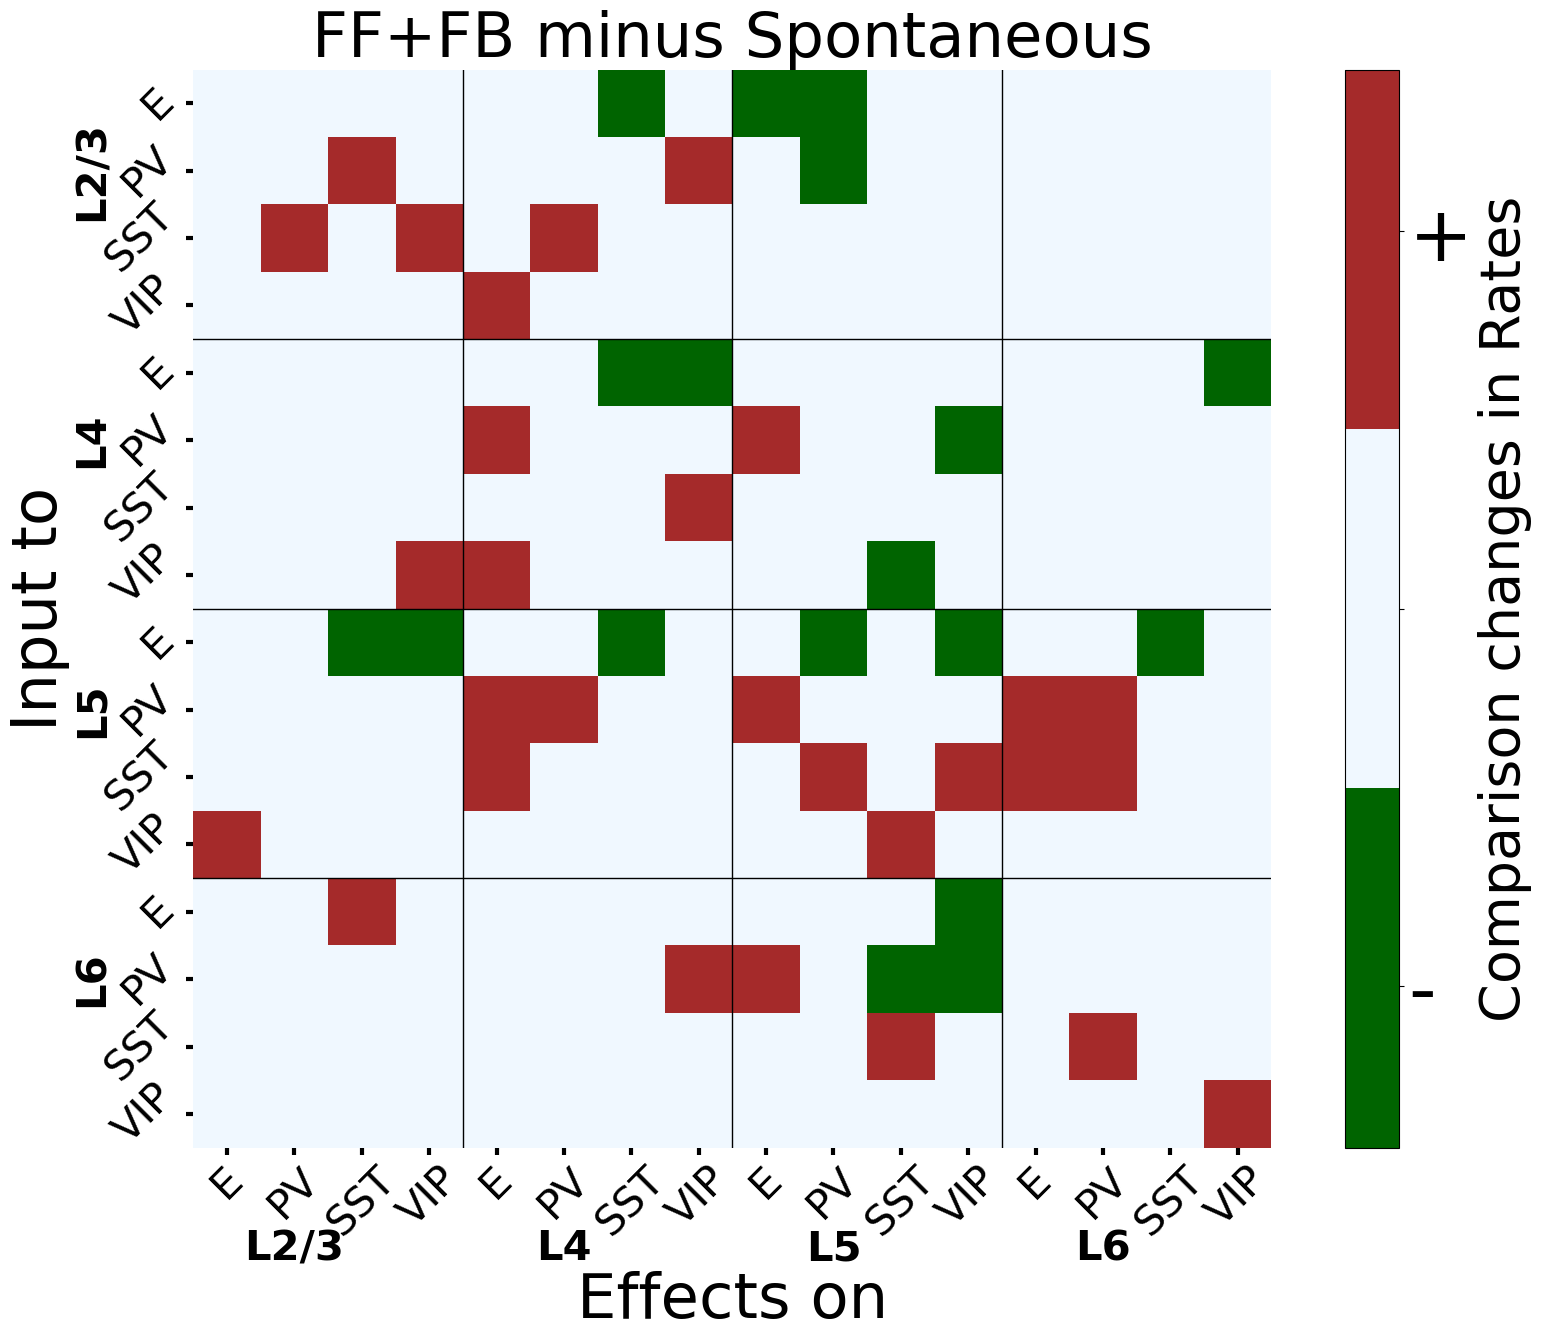

In [209]:
fig = plt.figure(figsize=(19, 14)) #create the figure

x_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP'] # labels for x-axis
y_axis_labels = ['E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP','E','PV','SST','VIP']


# Set your custom color palette
colors = ["darkgreen", "aliceblue",'brown' ]
sns.set_palette(sns.color_palette(colors))
col_map=sns.color_palette(colors)


#plot
mA_plot = sns.heatmap(np.array(sign_matrix_diff),square=True,cmap=col_map,cbar=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels, linewidths=0.) # plot GH with heatmap

#Layout
mA_plot.tick_params(axis='both', which='major', width=3, length=5)
mA_plot.set_xticklabels(mA_plot.get_xmajorticklabels(), fontsize = 30,rotation=45)
mA_plot.set_yticklabels(mA_plot.get_ymajorticklabels(), fontsize = 30,rotation=45)

# Define your labels and their positions
layer_labels = ['L2/3', 'L4', 'L5', 'L6']
x_positions = [1.5, 5.5, 9.5, 13.5]  # X positions for the labels, centered in each block of 4
y_positions = [1.5, 5.5, 9.5, 13.5]  # Y positions for the labels, centered in each block of 4

# Add text labels for the X axis
for label, pos in zip(layer_labels, x_positions):
    plt.text(pos, 17.5, label, ha='center', va='center', fontsize=30, fontweight='bold')

# Add text labels for the Y axis
for label, pos in zip(layer_labels, y_positions):
    plt.text(-1.5, pos, label, ha='center', va='center', fontsize=30, fontweight='bold', rotation=90)

#Line to guide the eye
for i in range(4, 16, 4):  # Start at 4 and count by 4s
    plt.axhline(i, color='black', linewidth=1)  # Horizontal line
    plt.axvline(i, color='black', linewidth=1)  # Vertical line

#Set bar layout
cbar = mA_plot.figure.colorbar(mA_plot.collections[0])
colorbar = mA_plot.collections[0].colorbar
colorbar.set_ticks([-0.7, 0, 0.7])
colorbar.set_ticklabels(['-', '', '+'])
colorbar.set_label("Comparison changes in Rates",size=40)
cax = mA_plot.figure.axes[-1]
cax.tick_params(labelsize=55)

#Labels of the axes
mA_plot.set_xlabel('Effects on', fontsize=45, labelpad=20)
mA_plot.set_ylabel('Input to', fontsize=45, labelpad=20)

#Use the one you need for your plot
plt.title('FF+FB minus Spontaneous',fontsize=45)        #Fig. 5D
#plt.title('FF+FB minus FF',fontsize=45)                #Fig. 5E
#plt.title('FF+FB minus FB',fontsize=45)                #Fig. 5F
#plt.title('Feedforward minus Spontaneous',fontsize=45) #Fig. 2C
#plt.title('Feedback minus Spontaneous',fontsize=45)    #Fig. 3B

#Save fig:  
plt.savefig('../IMAGES/fig5_matrix_FB&FF_DIFFvsSpont.png', bbox_inches='tight')    #Fig. 5D
#plt.savefig('../IMAGES/fig5_matrix_FB&FF_DIFFvsFF.png', bbox_inches='tight')       #Fig. 5E
#plt.savefig('../IMAGES/fig5_matrix_FB&FF_DIFFvsFB.png', bbox_inches='tight')       #Fig. 5F
#plt.savefig('../IMAGES/fig2_matrix_FF_DIFFvsSpont.png', bbox_inches='tight')       #Fig. 2C
#plt.savefig('../IMAGES/fig3_matrix_FB_DIFFvsSpont.png', bbox_inches='tight')       #Fig. 3B


plt.show(mA_plot)